/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/gaussian_process/kernels.py:445: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 0.1. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


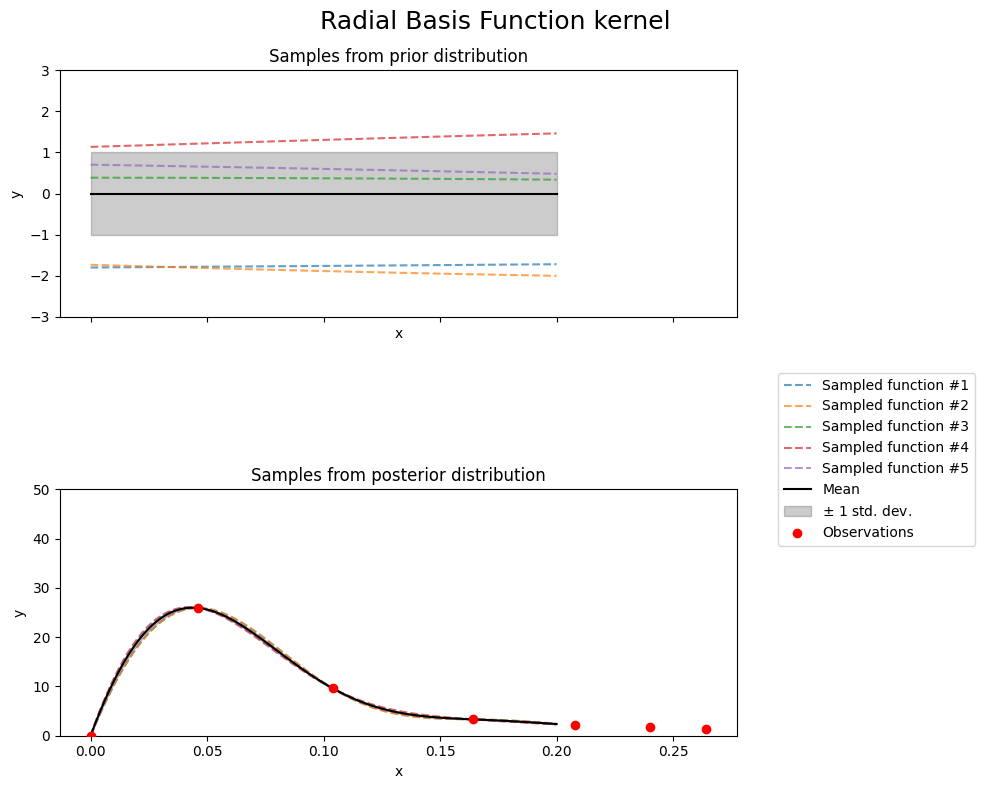

In [14]:
#function for sepearating data 

def separate_data(data):
    '''
    input: data as 4 collom array
    output: 4 separated vectors based on collum

    '''

    lines = data.strip().split('\n')
    COM = []
    COMerror = []
    sfactor = []
    sfactorerror = []

    for line in lines:
        parts = line.split()
        COM.append(float(parts[0]))
        COMerror.append(float(parts[1]))
        sfactor.append(float(parts[2]))
        sfactorerror.append(float(parts[3]))

    return COM, COMerror, sfactor, sfactorerror

#set up training data - [kobzev]

kobzev_dat = """    
0 0 0 0 
46.0E-03  1.2E-03           25.93       0.52
 104.0E-03  2.1E-03            9.59       0.19
 164.0E-03  3.3E-03            3.32       0.08
 208.0E-03  4.2E-03            2.13       0.05
 240.0E-03  4.8E-03            1.69       0.04
 264.3E-03  5.3E-03            1.44       0.04






 


   
"""
# Call separate_data function and unpack the returned tuples
kobzevCOM, kobzevCOMerror, kobzevsfactor, kobzevsfactorerror = separate_data(kobzev_dat)

import matplotlib.pyplot as plt
import numpy as np

def plot_gpr_samples(gpr_model, n_samples, ax):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    
    #prediction data - make it the correct size and shape for the example 
    x = np.linspace(0, 0.2, 100)
    X = x.reshape(-1, 1)

    #calculate mean and std based off prediction data 
    y_mean, y_std = gpr_model.predict(X, return_std=True)
    
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.7,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.2,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    ax.set_xlabel("x")
    ax.set_ylabel("y")



X_train = np.array(kobzevCOM).reshape(-1,1)

y_train = np.array(kobzevsfactor).reshape(-1,1)

n_samples = 5


from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=False, figsize=(10, 8))

# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")
axs[0].set_ylim([-3,3])

# plot posterior
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=100, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")
axs[1].set_ylim([0,50])
#axs[1].set_xlim([0,0.04])

fig.suptitle("Radial Basis Function kernel", fontsize=18)
plt.tight_layout()

In [13]:
print(f"Kernel parameters before fit:\n{kernel})")
print(
    f"Kernel parameters after fit: \n{gpr.kernel_} \n"
    f"Log-likelihood: {gpr.log_marginal_likelihood(gpr.kernel_.theta):.3f}"
)


Kernel parameters before fit:
1**2 * RBF(length_scale=1))
Kernel parameters after fit: 
125**2 * RBF(length_scale=0.1) 
Log-likelihood: -32.361


In [3]:
#make an example of adding more training data to show how the machine learns?
